<a href="https://colab.research.google.com/github/Bast-94/CYBERML-Project/blob/data-set/cyber-ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning for Cyber Security Project

In [1]:
! pip install -q openpyxl tensorflow

In [2]:
import pandas as pd
import numpy as np
import os
import sys
from mlsecu.anomaly_detection_use_case import *
from sklearn.metrics import f1_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

## Prepare Data

### Loading dataset

In [3]:
dataset_path = './data/SWaT.A3_dataset_Jul 19_labelled.xlsx'
df = pd.read_excel(dataset_path, header=1)

In [4]:
df.head()

GMT +0 Attack  Label FIT 101   LIT 101 MV 101  \
0                    timestamp    NaN    NaN   value     value  value   
1         2019-07-20T04:30:00Z    NaN    NaN       0  729.8658      1   
2         2019-07-20T04:30:01Z    NaN    NaN       0   729.434      1   
3  2019-07-20T04:30:02.004013Z    NaN    NaN       0    729.12      1   
4  2019-07-20T04:30:03.004013Z    NaN    NaN       0  728.6882      1   

  P1_STATE P101 Status P102 Status     AIT 201  ...  \
0    value       value       value       value  ...   
1        3           2           1  142.527557  ...   
2        3           2           1  142.527557  ...   
3        3           2           1  142.527557  ...   
4        3           2           1  142.527557  ...   

                                             LSH 601  \
0                                              value   
1  {u'IsSystem': False, u'Name': u'Active', u'Val...   
2  {u'IsSystem': False, u'Name': u'Active', u'Val...   
3  {u'IsSystem': False, u'Name': u'Active', u'Val...   
4  {u'IsSystem': False, u'Name': u'Active', u'Val...   

                                             LSH 602  \
0                                              value   
1  {u'IsSystem': False, u'Name': u'Active', u'Val...   
2  {u'IsSystem': False, u'Name': u'Active', u'Val...   
3  {u'IsSystem': False, u'Name': u'Active', u'Val...   
4  {u'IsSystem': False, u'Name': u'Active', u'Val...   

                                             LSH 603  \
0                                              value   
1  {u'IsSystem': False, u'Name': u'Inactive', u'V...   
2  {u'IsSystem': False, u'Name': u'Inactive', u'V...   
3  {u'IsSystem': False, u'Name': u'Inactive', u'V...   
4  {u'IsSystem': False, u'Name': u'Inactive', u'V...   

                                             LSL 601  \
0                                              value   
1  {u'IsSystem': False, u'Name': u'Inactive', u'V...   
2  {u'IsSystem': False, u'Name': u'Inactive', u'V...   
3  {u'IsSystem': False, u'Name': u'Inactive', u'V...   
4  {u'IsSystem': False, u'Name': u'Inactive', u'V...   

                                             LSL 602  \
0                                              value   
1  {u'IsSystem': False, u'Name': u'Inactive', u'V...   
2  {u'IsSystem': False, u'Name': u'Inactive', u'V...   
3  {u'IsSystem': False, u'Name': u'Inactive', u'V...   
4  {u'IsSystem': False, u'Name': u'Inactive', u'V...   

                                             LSL 603 P6 STATE P601 Status  \
0                                              value    value       value   
1  {u'IsSystem': False, u'Name': u'Active', u'Val...        2           1   
2  {u'IsSystem': False, u'Name': u'Active', u'Val...        2           1   
3  {u'IsSystem': False, u'Name': u'Active', u'Val...        2           1   
4  {u'IsSystem': False, u'Name': u'Active', u'Val...        2           1   

  P602 Status P603 Status  
0       value       value  
1           1           1  
2           1           1  
3           1           1  
4           1           1  

[5 rows x 80 columns]

### Cleaning data

In order to work easier on our dataset we need to clean it properly.

In [5]:
# date_format = "%Y-%m-%dT%H:%M:%S.%fZ"
full_df = df.drop([0])
full_df = full_df.reset_index(drop=True)
full_df = full_df.rename(columns={'GMT +0':'Date'})
full_df['Attack'] = full_df['Attack'].fillna('benign')
full_df['Label'] = full_df['Label'].fillna(0).astype(int)
# full_df['Date'] = pd.to_datetime(full_df['Date'])
full_df.to_csv('./data/SWaT.A3_dataset_Jul_19_labelled.csv')
full_df.head()

Date  Attack  Label FIT 101   LIT 101 MV 101  \
0         2019-07-20T04:30:00Z  benign      0       0  729.8658      1   
1         2019-07-20T04:30:01Z  benign      0       0   729.434      1   
2  2019-07-20T04:30:02.004013Z  benign      0       0    729.12      1   
3  2019-07-20T04:30:03.004013Z  benign      0       0  728.6882      1   
4         2019-07-20T04:30:04Z  benign      0       0  727.7069      1   

  P1_STATE P101 Status P102 Status     AIT 201  ...  \
0        3           2           1  142.527557  ...   
1        3           2           1  142.527557  ...   
2        3           2           1  142.527557  ...   
3        3           2           1  142.527557  ...   
4        3           2           1  142.527557  ...   

                                             LSH 601  \
0  {u'IsSystem': False, u'Name': u'Active', u'Val...   
1  {u'IsSystem': False, u'Name': u'Active', u'Val...   
2  {u'IsSystem': False, u'Name': u'Active', u'Val...   
3  {u'IsSystem': False, u'Name': u'Active', u'Val...   
4  {u'IsSystem': False, u'Name': u'Active', u'Val...   

                                             LSH 602  \
0  {u'IsSystem': False, u'Name': u'Active', u'Val...   
1  {u'IsSystem': False, u'Name': u'Active', u'Val...   
2  {u'IsSystem': False, u'Name': u'Active', u'Val...   
3  {u'IsSystem': False, u'Name': u'Active', u'Val...   
4  {u'IsSystem': False, u'Name': u'Active', u'Val...   

                                             LSH 603  \
0  {u'IsSystem': False, u'Name': u'Inactive', u'V...   
1  {u'IsSystem': False, u'Name': u'Inactive', u'V...   
2  {u'IsSystem': False, u'Name': u'Inactive', u'V...   
3  {u'IsSystem': False, u'Name': u'Inactive', u'V...   
4  {u'IsSystem': False, u'Name': u'Inactive', u'V...   

                                             LSL 601  \
0  {u'IsSystem': False, u'Name': u'Inactive', u'V...   
1  {u'IsSystem': False, u'Name': u'Inactive', u'V...   
2  {u'IsSystem': False, u'Name': u'Inactive', u'V...   
3  {u'IsSystem': False, u'Name': u'Inactive', u'V...   
4  {u'IsSystem': False, u'Name': u'Inactive', u'V...   

                                             LSL 602  \
0  {u'IsSystem': False, u'Name': u'Inactive', u'V...   
1  {u'IsSystem': False, u'Name': u'Inactive', u'V...   
2  {u'IsSystem': False, u'Name': u'Inactive', u'V...   
3  {u'IsSystem': False, u'Name': u'Inactive', u'V...   
4  {u'IsSystem': False, u'Name': u'Inactive', u'V...   

                                             LSL 603 P6 STATE P601 Status  \
0  {u'IsSystem': False, u'Name': u'Active', u'Val...        2           1   
1  {u'IsSystem': False, u'Name': u'Active', u'Val...        2           1   
2  {u'IsSystem': False, u'Name': u'Active', u'Val...        2           1   
3  {u'IsSystem': False, u'Name': u'Active', u'Val...        2           1   
4  {u'IsSystem': False, u'Name': u'Active', u'Val...        2           1   

  P602 Status P603 Status  
0           1           1  
1           1           1  
2           1           1  
3           1           1  
4           1           1  

[5 rows x 80 columns]

Let's now display the `LIT 101` column.

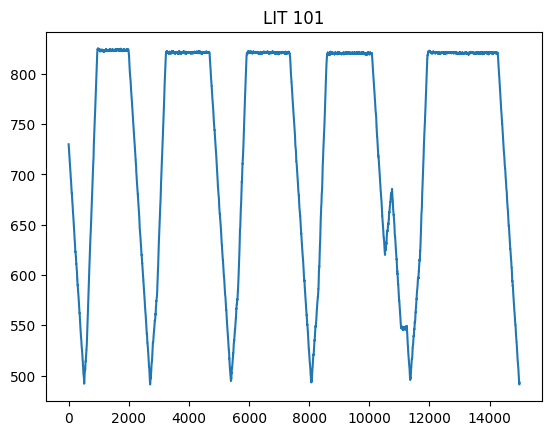

In [6]:
full_df['LIT 101'].plot()
plt.title("LIT 101")
plt.show()

In [7]:
# get unique labels
labels = full_df['Attack'].unique()
print(f'Possible labels: {list(labels)}')

Possible labels: ['benign', 'Spoofing', 'Switch_ON', 'Switch_close', 'Switch_off']


In [8]:
print('Columns with only one unique value:')
for col in full_df.columns:
    if (len(full_df[col].unique()) == 1):
        print(col)

Columns with only one unique value:
P102 Status
LS 201
LS 202
LSL 203
LSLL 203
P2_STATE
P201 Status
P202 Status
P204 Status
P206 Status
P207 Status
P208 Status
P302 Status
AIT 401
LS 401
P4_STATE
P402 Status
P403 Status
P404 Status
MV 502
MV 503
MV 504
P5_STATE
P501 Status
P502 Status
LSH 602
LSH 603
LSL 601
LSL 602
LSL 603
P6 STATE
P602 Status
P603 Status


Supprimons les colonnes qui contiennent une seule valeur, car elles ne sont pas utiles pour la classification.

On en compte finalement 33.


In [9]:
# on supprime les colonnes qui ont une seule valeur dans un nouveau dataframe
df_cleaned = full_df.copy()
for col in full_df.columns:
    if len(full_df[col].unique()) == 1:
        df_cleaned = df_cleaned.drop(columns=[col])

In [10]:
print(f'Number of features: {len(df_cleaned.columns)}')
print(f'Number of samples: {len(df_cleaned)}')

Number of features: 47
Number of samples: 14996


In [11]:
df_cleaned.to_csv('./data/SWaT.A3_dataset_Jul_19_labelled_cleaned.csv')
df_cleaned.head()

Date  Attack  Label FIT 101   LIT 101 MV 101  \
0         2019-07-20T04:30:00Z  benign      0       0  729.8658      1   
1         2019-07-20T04:30:01Z  benign      0       0   729.434      1   
2  2019-07-20T04:30:02.004013Z  benign      0       0    729.12      1   
3  2019-07-20T04:30:03.004013Z  benign      0       0  728.6882      1   
4         2019-07-20T04:30:04Z  benign      0       0  727.7069      1   

  P1_STATE P101 Status     AIT 201   AIT 202  ...   FIT 502   FIT 503  \
0        3           2  142.527557  9.293002  ...  0.310362  0.623628   
1        3           2  142.527557  9.293002  ...  0.315102  0.623628   
2        3           2  142.527557  9.293002  ...  0.317023  0.623628   
3        3           2  142.527557  9.289157  ...  0.308057  0.623628   
4        3           2  142.527557  9.289157  ...  0.303446  0.623628   

    FIT 504 MV 501     PIT 501   PIT 502     PIT 503  FIT 601  \
0  0.213432      2  167.601257  2.963509  119.921173  0.00032   
1  0.212984      2  167.601257  2.963509  119.921173  0.00032   
2  0.212984      2  167.601257  2.963509  119.921173  0.00032   
3  0.212792      2  167.601257  2.963509  119.921173  0.00032   
4  0.214009      2  167.601257  2.963509  119.921173  0.00032   

                                             LSH 601 P601 Status  
0  {u'IsSystem': False, u'Name': u'Active', u'Val...           1  
1  {u'IsSystem': False, u'Name': u'Active', u'Val...           1  
2  {u'IsSystem': False, u'Name': u'Active', u'Val...           1  
3  {u'IsSystem': False, u'Name': u'Active', u'Val...           1  
4  {u'IsSystem': False, u'Name': u'Active', u'Val...           1  

[5 rows x 47 columns]

### Dimensionality reduction with Principal Component Analysis (PCA)

#### One-hot encoding (categorical data)

In [12]:
df_copy = df_cleaned.copy()
one_hot_encoded_df = get_one_hot_encoded_dataframe(df_copy.drop(columns=['Date', 'Attack', 'Label']))
no_nan_df = remove_nan_through_mean_imputation(one_hot_encoded_df)

#### PCA

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca = pca.fit(no_nan_df)

In [14]:
X_reduced = pca.transform(no_nan_df)
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance ratio: {explained_variance}')

Explained variance ratio: [0.07825942 0.0591068  0.01757559]


#### Dataset - 3D representation

In [15]:
import plotly.graph_objects as go
import plotly.offline as py

def plot_3D_scatter(data: pd.DataFrame, dataset_name: str) -> None:
    """
    Show 3D plot of the input data.
    
    Args:
        data (pd.DataFrame): input data
    """
    layout = go.Layout(scene={"aspectmode": "cube"})
    layout['scene'].update(xaxis_title='X', yaxis_title='Y', zaxis_title='Z')
    layout['title'] = f"{dataset_name} Dataset distribution"
    fig = go.Figure(data=[go.Scatter3d(
        x=data['X'],
        y=data['Y'],
        z=data['Z'],
        mode='markers',
        text=data['Attack'],
        marker=dict(
            size=2,
            color=data['Color'],
            colorscale='Viridis',
            opacity=0.5
        )
    )], layout=layout)
    py.iplot(fig, show_link=False)

def get_color(name: str) -> str:
    d = {
        'benign': 'black',
        'Spoofing': 'mediumvioletred',
        'Switch_ON': 'darkviolet',
        'Switch_close': 'rebeccapurple',
        'Switch_off': 'seagreen'
    }
    return d[name]

X_reduced_df = pd.DataFrame(X_reduced)
X_reduced_df['Attack'] = df_cleaned['Attack']
X_reduced_df['Color'] = df_cleaned['Attack'].apply(get_color)
X_reduced_df = X_reduced_df.rename(columns={0: 'X', 1: 'Y', 2: 'Z'})

plot_3D_scatter(X_reduced_df, "SWaT")

## LSTM Model and RMS-deviation

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, RepeatVector, TimeDistributed
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

### Data preparation

Our LSTM must take a specific shape of data. We need to reshape our data in order to fit the model.

Here our dataset has a shape of (14996,49). We know that the LSTM works better with 200-400 time steps per sample. We will use 300 time steps per sample.

15 000 / 60 = 250 samples

Let's have 49 samples with 300 time steps each and the last one with 296 time steps.

n_samples = 250
time_steps = 60
features = 49

In [17]:
is_float = lambda x: isinstance(x, float)
for col in df_cleaned.columns:
  if col == 'Date':
    continue

  if df_cleaned[col].apply(pd.to_numeric, errors='coerce').notna().all():
    df_cleaned[col] = df_cleaned[col].apply(pd.to_numeric, errors='coerce')

In [18]:
# format the data for LSTM like this [samples, time steps, features]
features = df_cleaned.drop(['Date', 'Attack', 'Label', "LSH 601"], axis=1)
labels = df_cleaned['Label']

# Normalisation
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

Text(0.5, 0, 'Time')

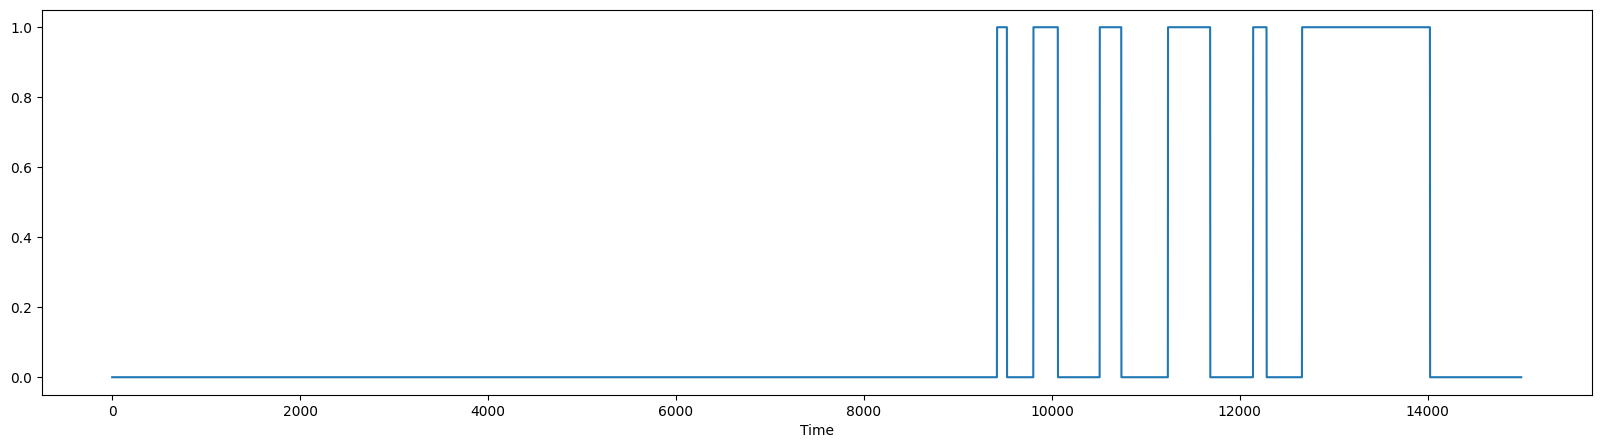

In [19]:
# plot labels
plt.figure(figsize=(20, 5))
plt.plot(labels)
plt.xlabel('Time')

Afin d'implémenter un LSTM il faut générer le dataset issue de nos série temporelles. Le but sera d'extraire plusieurs séquences d'une taille de séquence définie et de lui affecter un label. Si une séquence contient une valeur  `Label` à 1 alors toute la séquence est labellisée comme étant à 1.

In [20]:
n_steps = 120 # Par exemple, séquences de 60 pas de temps
X, y = [], []
for i in range(n_steps, labels.shape[0], n_steps):
    X.append(features_scaled[i-n_steps:i])
    if np.isin(1, labels[i-n_steps:i]):
        y.append(1)
    else:
        y.append(0)

X, y = np.array(X), np.array(y)

In [21]:
# keep 80% of the data for training and 20% for testing
n_train = int(X.shape[0] * 0.8)
X_train, X_test = X[:n_train], X[n_train:]

y_train, y_test = y[:n_train], y[n_train:]

In [22]:
X_train.shape, X_test.shape
print(f'Nombre de séquences d\'entraînement: {X_train.shape[0]}')
print(f'Fenêtre de temps: {X_train.shape[1]}')
print(f'Nombre de séquences de test: {X_test.shape[0]}')

Nombre de séquences d'entraînement: 99
Fenêtre de temps: 120
Nombre de séquences de test: 25


In [23]:
seq_len = X_train.shape[1]  # Longueur des séquences d'entrée
n_features = X_train.shape[2]  # Nombre de caractéristiques dans chaque pas de temps

model = Sequential()
# Encodeur
model.add(LSTM(128, activation='relu', input_shape=(seq_len, n_features)))
model.add(RepeatVector(seq_len))  # Répète le contexte pour la longueur de la séquence de sortie

# Décodeur
model.add(LSTM(128, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(n_features)))  # Prédire chaque pas de temps et chaque caractéristique

model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

model.summary()

2023-11-07 20:05:53.845262: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-11-07 20:05:53.845283: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-11-07 20:05:53.845288: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-11-07 20:05:53.845358: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-07 20:05:53.845543: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               88064     
                                                                 
 repeat_vector (RepeatVecto  (None, 120, 128)          0         
 r)                                                              
                                                                 
 lstm_1 (LSTM)               (None, 120, 128)          131584    
                                                                 
 time_distributed (TimeDist  (None, 120, 43)           5547      
 ributed)                                                        
                                                                 
Total params: 225195 (879.67 KB)
Trainable params: 225195 (879.67 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
# history = model.fit(X_train, X_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
# # save history to csv
# pd.DataFrame(history.history).to_csv('./data/history.csv')
# # Plot history
# fig = plt.figure(figsize=(20, 5))
# ax = fig.add_subplot(1, 1, 1)
# ax.plot(history.history['loss'], label='train')
# ax.plot(history.history['val_loss'], label='validation')
# ax.set_xlabel('Epoch')
# ax.set_ylabel('Loss')
# ax.legend()
# ax.set_title('Loss over epochs')
# plt.show()
# fig.savefig('./data/history.png')


## Outlier detection with Isolation forest.

Firstly we need to retrieve columns list which contain categorical data by checking if they do not contain float value or datetime.

In [25]:
is_float = lambda x: isinstance(x, float)
for col in full_df.columns:
  if col == 'Date':
    continue

  if full_df[col].apply(pd.to_numeric, errors='coerce').notna().all():
    full_df[col] = full_df[col].apply(pd.to_numeric, errors='coerce')

Isolation forest Algorithm is applied on categorical data with precising an `outliers_fraction` which represent the outlier rate in our dataset. To do so we just need to get the total count of attacks (labelled 1 data) and divide it by the total count.

With `get_list_of_if_outliers` implemented in previous practical sessions, we apply Isolation forest algorithm on categroical data. Then we will retrieve outliers indexes.

In [26]:
outlier_fraction = (full_df['Label'] == 1).sum() / len(full_df)
# attacked_columns = ['FIT 401', 'LIT 301', 'P601 Status', 'MV201', 'P101 Status', 'MV 501', 'P301 Status']
if_outlier_indexes = get_list_of_if_outliers(full_df.drop(columns=['Date', 'Attack', 'Label']), outlier_fraction, seed=35)

Let's compute accuracy by counting predicted outliers which are real outliers.

In [27]:
if_outliers = np.zeros(len(full_df))
if_outliers[if_outlier_indexes] = 1
full_df['if_outliers'] = if_outliers

attack_if_outliers = full_df[(full_df['if_outliers'] == 1) & (full_df['Label'] == 1)]
if_outliers_matches = len(attack_if_outliers)
print(f'{if_outliers_matches} outliers found with Isolation Forest are labeled as attacks')

877 outliers found with Isolation Forest are labeled as attacks


Then we compute F1 Score

In [28]:
print(classification_report(full_df['if_outliers'], full_df['Label']))

              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87     12443
         1.0       0.34      0.34      0.34      2553

    accuracy                           0.78     14996
   macro avg       0.60      0.60      0.60     14996
weighted avg       0.78      0.78      0.78     14996



Let's now display confusion matrix.

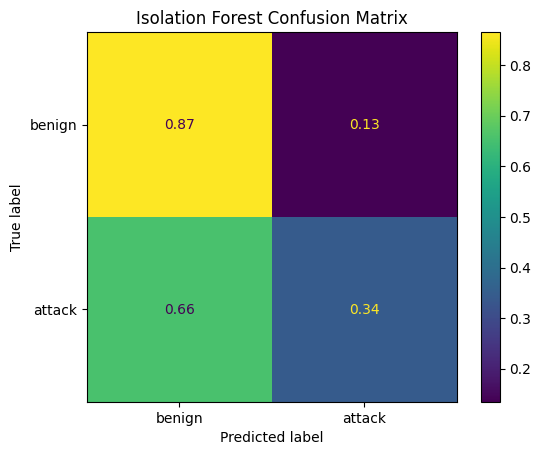

In [29]:
def confusion_matrix_plot(y_true, y_pred, title):
  cm = confusion_matrix(y_true, y_pred, normalize='true')
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['benign', 'attack'])
  disp.plot()
  plt.title(title)
  plt.show()

confusion_matrix_plot(full_df['if_outliers'], full_df['Label'], 'Isolation Forest Confusion Matrix')

From the results, we can see that the Isolation Forest algorithm is not much sensitive nor precise when detecting outliers.

In [30]:
full_df.to_csv('./data/clean_swat.csv')

## Outlier detection with LocalOutlierFactor

In [31]:
local_factor_outliers_indices = get_list_of_lof_outliers(full_df.drop(columns=['Date', 'Attack', 'Label']), outlier_fraction)

lof_outliers = np.zeros(len(full_df))
lof_outliers[local_factor_outliers_indices] = 1
full_df['lof_outliers'] = lof_outliers

In [32]:
attack_lof_outliers = full_df[(full_df['lof_outliers'] == 1) & (full_df['Label'] == 1)]
lof_outliers_matches = len(attack_lof_outliers)
print(f'{lof_outliers_matches} outliers found with Local Outlier Factor are labeled as attacks')

606 outliers found with Local Outlier Factor are labeled as attacks


In [33]:
print(classification_report(full_df['lof_outliers'], full_df['Label']))

              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84     12443
         1.0       0.24      0.24      0.24      2553

    accuracy                           0.74     14996
   macro avg       0.54      0.54      0.54     14996
weighted avg       0.74      0.74      0.74     14996



Now we display the confusion matrix.

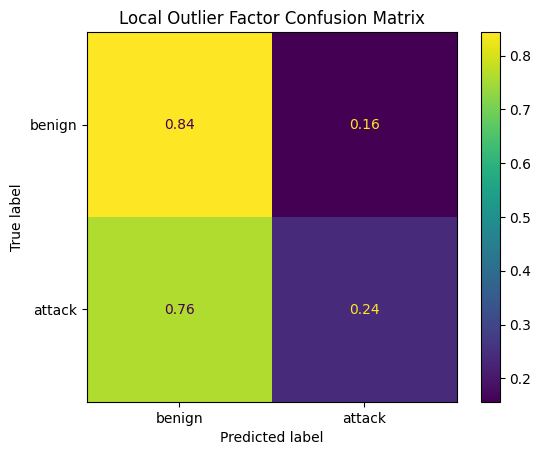

In [34]:
confusion_matrix_plot(full_df['lof_outliers'], full_df['Label'], 'Local Outlier Factor Confusion Matrix')

In comparison, as we can see from this report, LocalOutlierFactor algorithm is even less sensitive than the Isolation Forest algorithm.\
We can assume that an unsupervised algorithm may not be the best choice for this dataset.

## Combining detected outliers

We can now try to combine the results of the two algorithms to see if we can get better results.

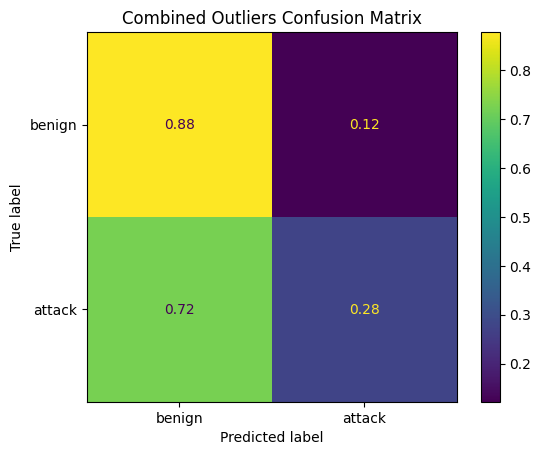

In [35]:
combined_outliers = np.zeros(len(full_df))
combined_outliers[if_outlier_indexes] = 1
combined_outliers[local_factor_outliers_indices] = 1
full_df['combined_outliers'] = combined_outliers

confusion_matrix_plot(combined_outliers, full_df['Label'], 'Combined Outliers Confusion Matrix')

We can deduce from this confusion matrix that there is a hypersensibily to begnin data, as the begnin cells present an elevated recall.

In [36]:
print(classification_report(full_df['combined_outliers'], full_df['Label']))

              precision    recall  f1-score   support

         0.0       0.73      0.88      0.79     10282
         1.0       0.51      0.28      0.36      4714

    accuracy                           0.69     14996
   macro avg       0.62      0.58      0.58     14996
weighted avg       0.66      0.69      0.66     14996



### 3D representation of combined outliers

In [37]:
def plot_3D_scatter(data: pd.DataFrame, dataset_name: str) -> None:
    """
    Show 3D plot of the input data.
    
    Args:
        data (pd.DataFrame): input data
    """
    layout = go.Layout(scene={"aspectmode": "cube"})
    layout['scene'].update(xaxis_title='X', yaxis_title='Y', zaxis_title='Z')
    layout['title'] = f"{dataset_name} Dataset distribution"
    fig = go.Figure(data=[go.Scatter3d(
        x=data['X'],
        y=data['Y'],
        z=data['Z'],
        mode='markers',
        text=data['Attack'],
        marker=dict(
            size=2,
            color=data['Detected_Outliers'],
            colorscale='Viridis',
            opacity=0.5
        )
    )], layout=layout)
    py.iplot(fig, show_link=False)

def get_outlier_color(val: int) -> str:
    return 'red' if val == 1 else 'black'

X_reduced_df['Detected_Outliers'] = full_df['combined_outliers'].apply(get_outlier_color)
plot_3D_scatter(X_reduced_df, "SWaT")

From what we can observe, the combination of the two algorithms does not seem to be profitable here. Indeed, we observe a lot of false positives but also false negatives. The problem is that the sensibilities of both algorithms are not tuned to the true outliers. The detected outliers are not very precise either to determine the begnign samples.

## Binary classification

Let us now focus on supervised learning algorithms, starting with binary classification. The goal is simple, we want to be able to classify the data into two categories: benign or attack.

### Data preparation

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score, TimeSeriesSplit
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

First of all, we need to prepare our data. We will use the same data as for the unsupervised algorithms. The categorical data will be encoded with one-hot encoding, and the NaN values will be replaced through a mean imputation method.

In [39]:
seed: int = 42

n_attacks = full_df[full_df['Label'] == 1].shape[0]
df_begnin = full_df[full_df['Label'] == 0].sample(n_attacks, random_state=seed)
df_attacks = full_df[full_df['Label'] == 1]
df_sampled = pd.concat([df_begnin, df_attacks])

one_hot_encoded_df = get_one_hot_encoded_dataframe(df_sampled.drop(columns=['Date', 'Attack', 'Label', 'if_outliers', 'lof_outliers', 'combined_outliers']))
no_nan_df = remove_nan_through_mean_imputation(one_hot_encoded_df)

### Methodology

For each supervised classification algorithm, we will use the same methodology:

* Train the model by suffling the training data
* Train the model by leaving the training data as it is
* Train the model with cross-validation

The idea behind this comparative approach is to see how the model perform with various inter-class distributions.

### Random Forest Classifier

#### Cross-validation

In [40]:
def cross_validate_model(X, y, model_gen, model_name, tscv) -> pd.DataFrame:
    res_total = pd.DataFrame()
    n = 0
    roc_auc_total = 0
    for (train_index, test_index) in tscv.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model = model_gen()
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_pred = model.predict(X_test)
        res = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True, zero_division=0))
        try:
            roc_auc = roc_auc_score(y_train, y_train_pred, average='weighted', multi_class='raise')
            n += 1
            roc_auc_total += roc_auc
        except ValueError:
            print(f'roc_auc_score failed for {model_name}')
            roc_auc = np.nan

        res_total = pd.concat([res_total, res[['weighted avg']]], axis=1)

    res_total = res_total.mean(axis=1).to_frame().T.drop(columns=['support'])
    res_total.index = [model_name]
    if n > 0:
        res_total['roc_auc_train'] = [roc_auc_total / n]
    return res_total

def plot_feature_importance(model, orignal_df: pd.DataFrame):
    feature_importance = model.feature_importances_
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    sorted_idx = sorted_idx[-10:]
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.figure(figsize=(20, 5))
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, orignal_df.columns[sorted_idx])
    plt.title('Feature Importance')
    plt.show()

def plot_labels(train, test):
    fig, ax = plt.subplots(2, 1, figsize=(20, 5))
    ax[0].plot(train[::10])
    ax[1].plot(test[::10], color='orange')
    fig.legend(['Train', 'Test'])
    fig.suptitle('Labels (Train/Test)')
    plt.show()

In [41]:
def gen_random_forest() -> RandomForestClassifier:
    return RandomForestClassifier(
        n_estimators=256,
        max_depth=4,
        max_features='sqrt',
        random_state=seed
    )

In [42]:
X = no_nan_df.to_numpy()
y = df_sampled['Label'].to_numpy()

n_splits = 3
tscv = TimeSeriesSplit(n_splits=n_splits, test_size=int(0.2* X.shape[0] // n_splits))

cross_validate_model(X, y, gen_random_forest, 'Random Forest', tscv)

precision    recall  f1-score  roc_auc_train
Random Forest        1.0  0.830392  0.900246       0.987964

#### Training with shuffled data

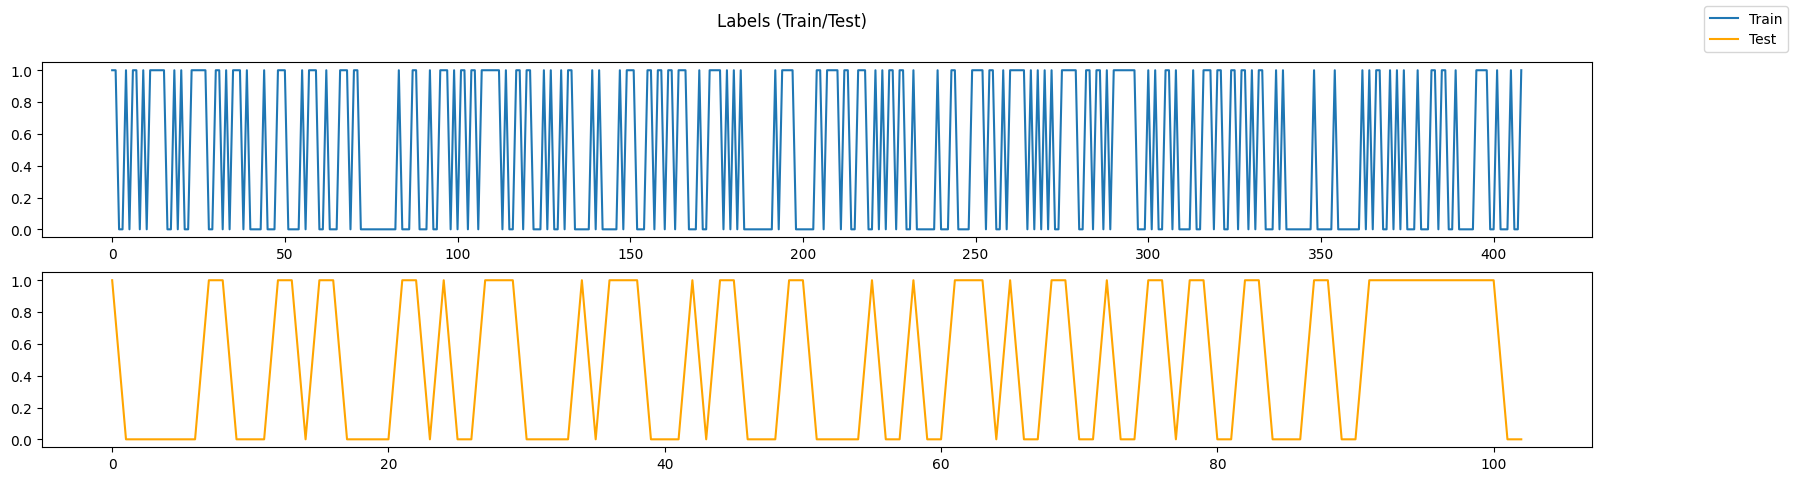

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
plot_labels(y_train, y_test)

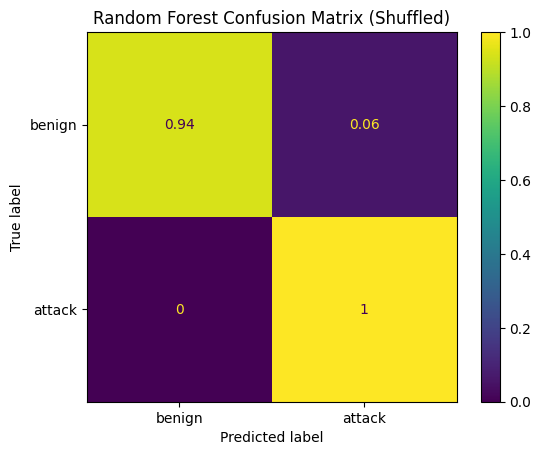

In [44]:
random_forest = gen_random_forest()
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)
confusion_matrix_plot(y_test, y_pred, 'Random Forest Confusion Matrix (Shuffled)')

##### Feature importance

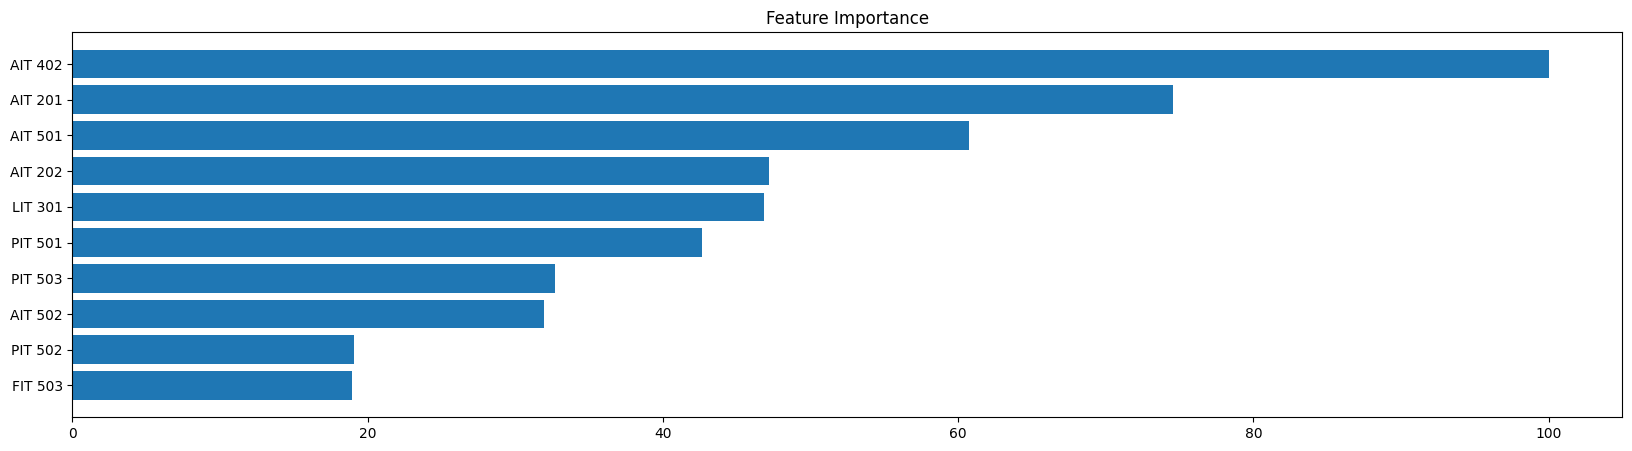

In [45]:
plot_feature_importance(random_forest, no_nan_df)

#### Training with non-shuffled data

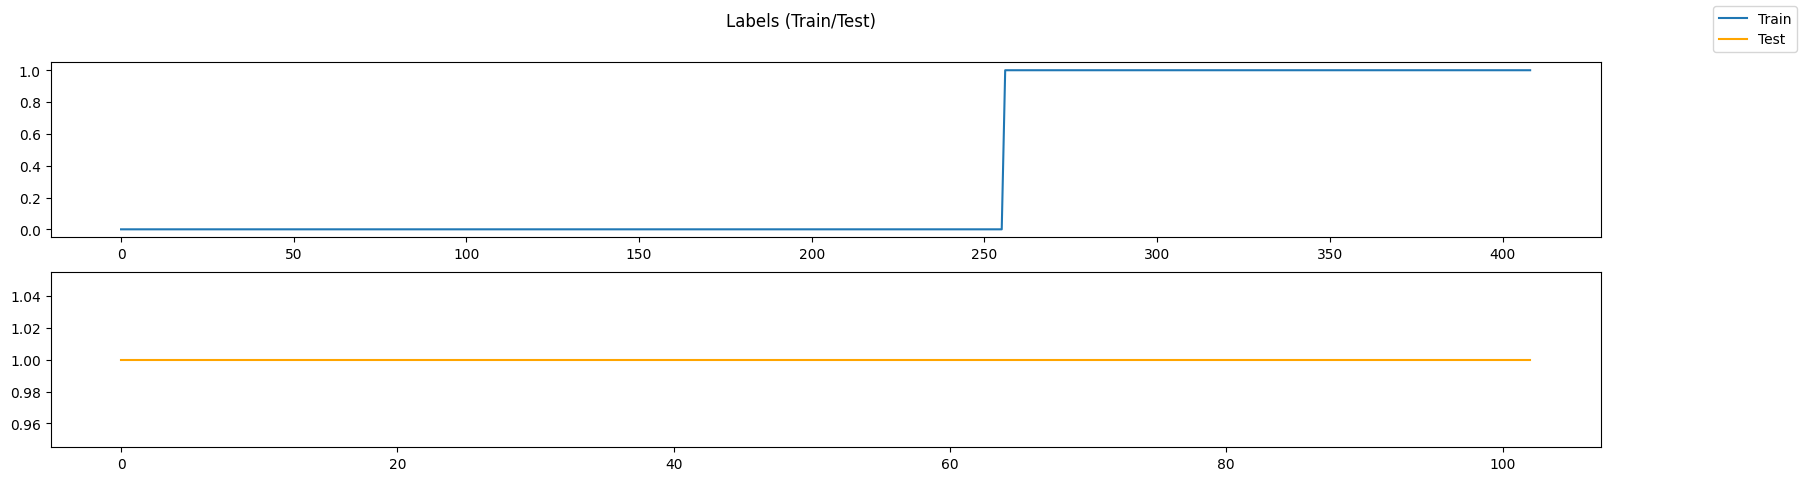

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
plot_labels(y_train, y_test)

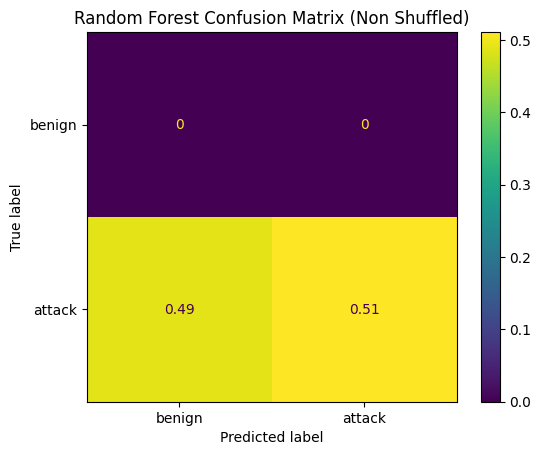

In [47]:
random_forest = gen_random_forest()
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
confusion_matrix_plot(y_test, y_pred, 'Random Forest Confusion Matrix (Non Shuffled)')

##### Feature importance

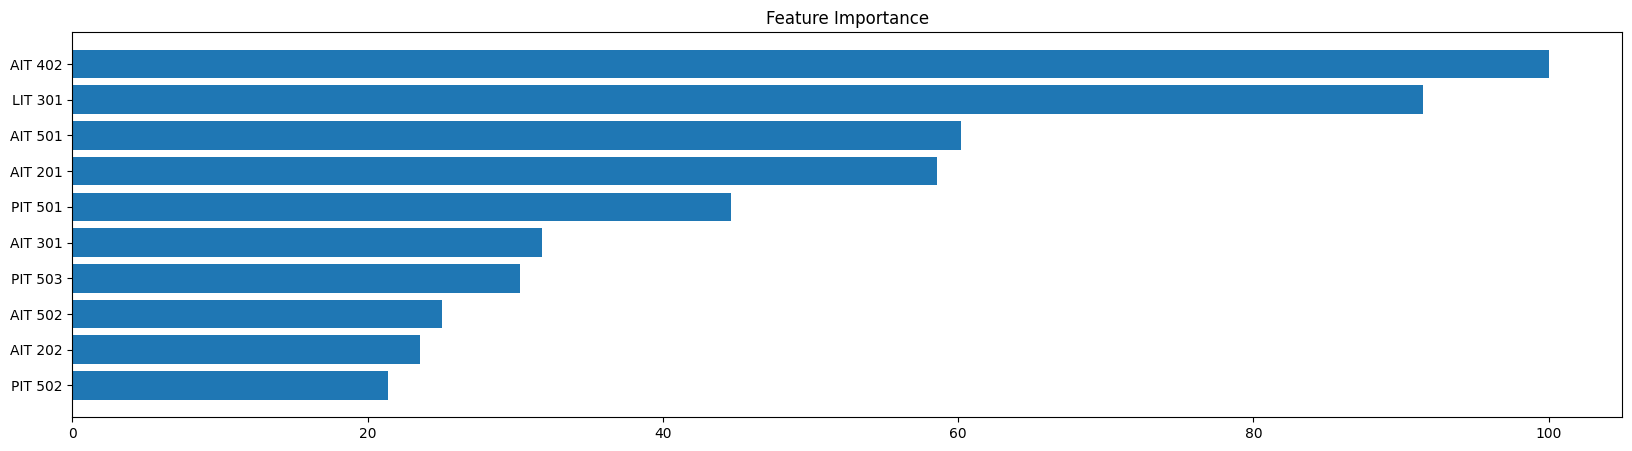

In [48]:
plot_feature_importance(random_forest, no_nan_df)

### Decision Tree Classifier

In [49]:
def gen_decision_tree() -> DecisionTreeClassifier:
    return DecisionTreeClassifier(
        max_depth=9,
        max_features='sqrt',
        random_state=seed
    )

cross_validate_model(X, y, gen_decision_tree, 'Decision Tree', tscv)

precision   recall  f1-score  roc_auc_train
Decision Tree        1.0  0.82451  0.885547       0.997561

#### Training with shuffled data

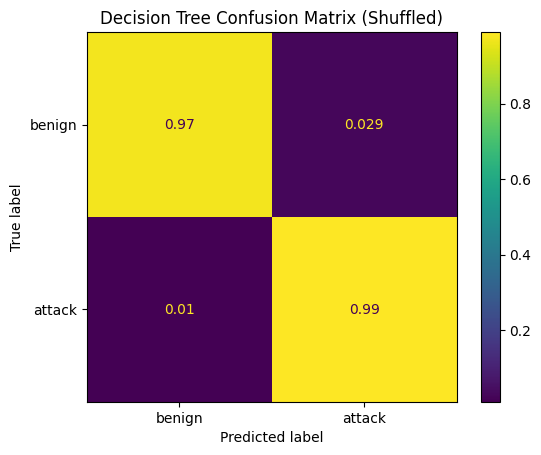

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
decision_tree = gen_decision_tree()
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)
confusion_matrix_plot(y_test, y_pred, 'Decision Tree Confusion Matrix (Shuffled)')

##### Feature importance

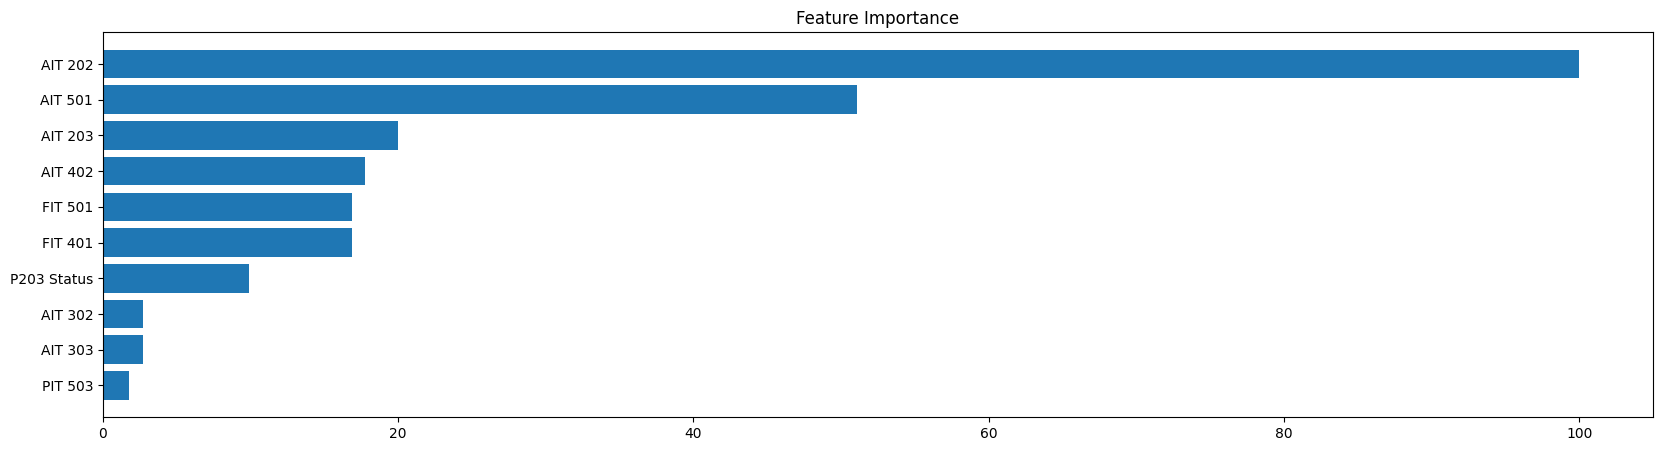

In [51]:
plot_feature_importance(decision_tree, no_nan_df)

#### Training with non-shuffled data

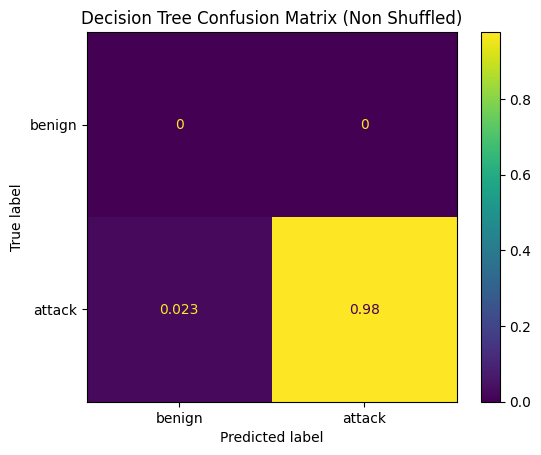

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
decision_tree = gen_decision_tree()
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)
confusion_matrix_plot(y_test, y_pred, 'Decision Tree Confusion Matrix (Non Shuffled)')

##### Feature importance

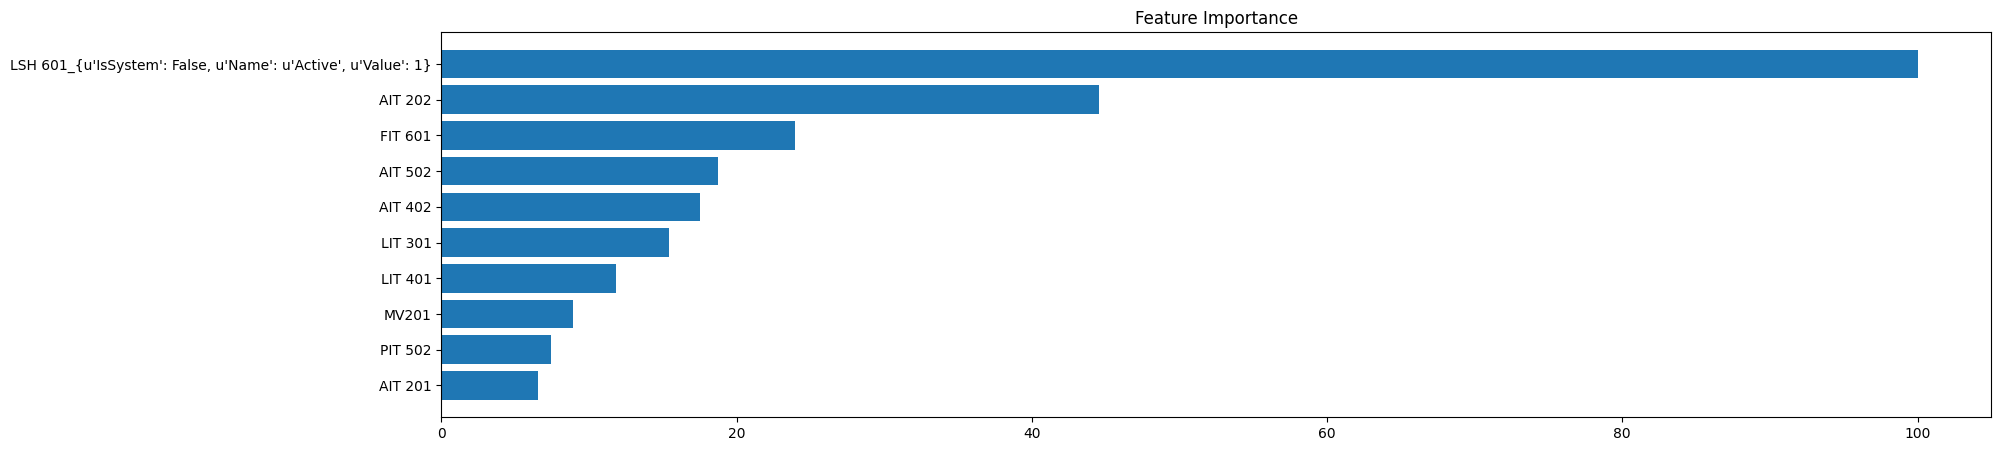

In [53]:
plot_feature_importance(decision_tree, no_nan_df)

### XGBoost Classifier

#### Cross-validation

In [54]:
def gen_XGBoostClassifier() -> XGBClassifier:
    return XGBClassifier(
        n_estimators=400,
        max_depth=2,
        learning_rate=1e-2,
        random_state=seed
    )

cross_validate_model(X, y, gen_XGBoostClassifier, 'XGBoost', tscv)

precision    recall  f1-score  roc_auc_train
XGBoost        1.0  0.919608  0.954292       0.990066

#### Training with shuffled data

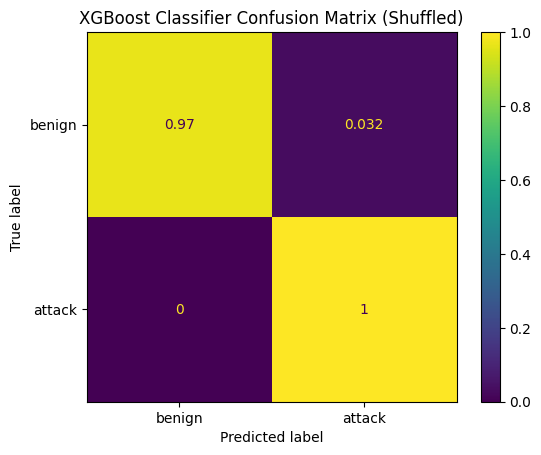

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
xgboost = gen_XGBoostClassifier()
xgboost.fit(X_train, y_train)

y_pred = xgboost.predict(X_test)
confusion_matrix_plot(y_test, y_pred, 'XGBoost Classifier Confusion Matrix (Shuffled)')

##### Feature importance

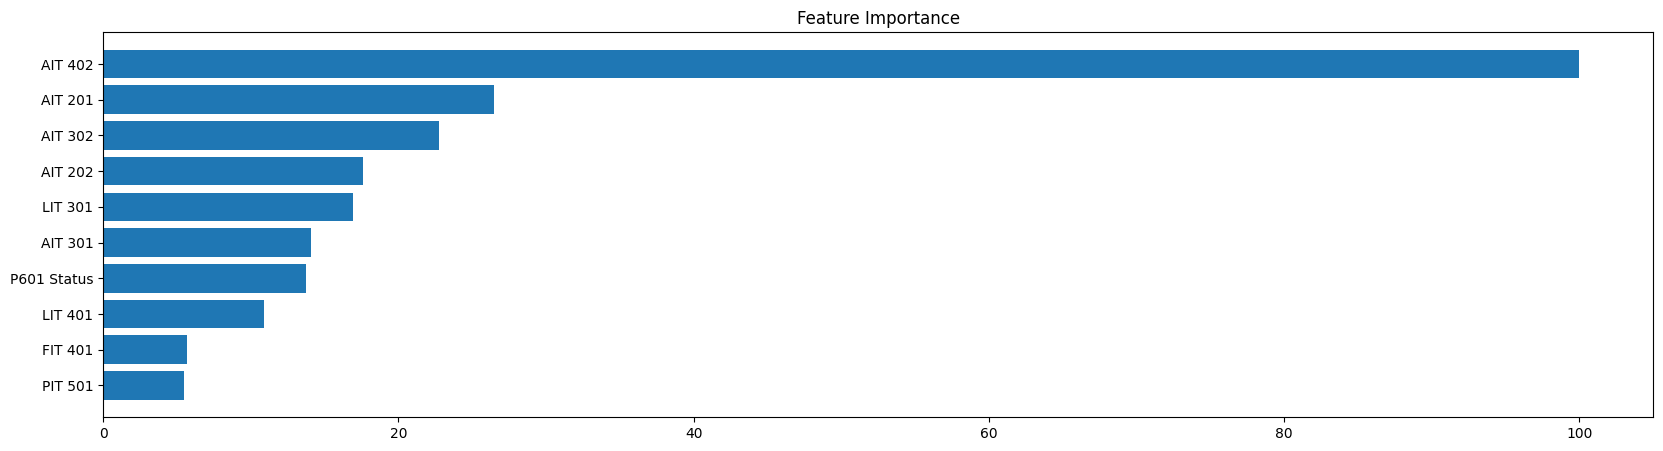

In [56]:
plot_feature_importance(xgboost, no_nan_df)

#### Training with non-shuffled data

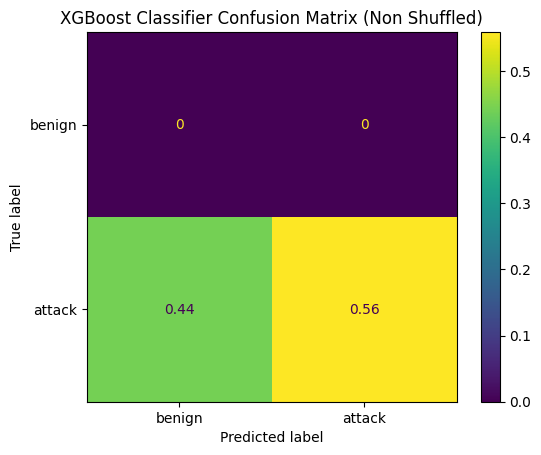

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
xgboost = gen_XGBoostClassifier()
xgboost.fit(X_train, y_train)

y_pred = xgboost.predict(X_test)
confusion_matrix_plot(y_test, y_pred, 'XGBoost Classifier Confusion Matrix (Non Shuffled)')

##### Feature importance

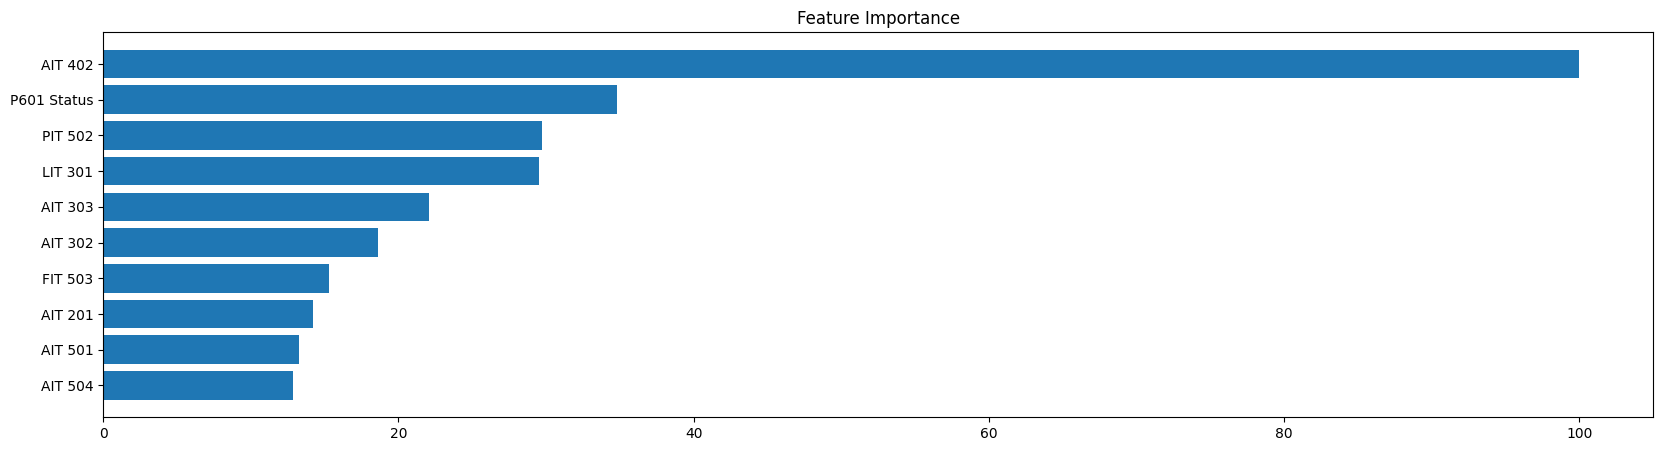

In [58]:
plot_feature_importance(xgboost, no_nan_df)

### Multi-layer Perceptron Classifier

#### Cross-validation

In [59]:
def gen_mlp() -> MLPClassifier:
    return MLPClassifier(
        hidden_layer_sizes=(256, 256),
        batch_size=64,
        learning_rate='adaptive',
        learning_rate_init=5e-3,
        random_state=seed,
        early_stopping=True,
        shuffle=False
    )

cross_validate_model(X, y, gen_mlp, 'MLP', tscv)

precision    recall  f1-score  roc_auc_train
MLP        1.0  0.828431  0.884488        0.98683

#### Training with shuffled data

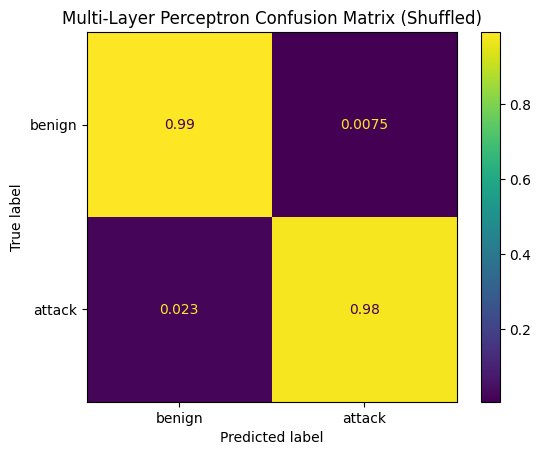

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
mlp = gen_mlp()
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)
confusion_matrix_plot(y_test, y_pred, 'Multi-Layer Perceptron Confusion Matrix (Shuffled)')

#### Training with non-shuffled data

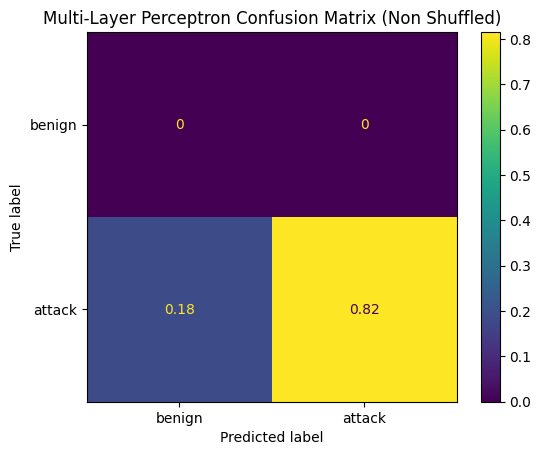

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
mlp = gen_mlp()
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)
confusion_matrix_plot(y_test, y_pred, 'Multi-Layer Perceptron Confusion Matrix (Non Shuffled)')